### Data Cleaning

The following will be done in this data cleaning stage

- check/handle for missing values
- check/handle for duplicates
- identify/handle possible outliers.

In order to store the file in a database, data has to be cleaned first as the data types needs to be formatted appropriately.

The dataset has more than 18000 records.

#### Imports Packages and Libraries

In [1]:
import numpy as np
import pandas as pd 
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import requests

In [2]:
 np.__version__

'1.24.3'

In [2]:
#suppress scientific notation by setting float_format
pd.options.display.float_format = '{:.2f}'.format 

In [152]:
# to import n/a fields as a string rather than NaN
booli_df=pd.read_csv('booli_data.csv',keep_default_na=False)

In [153]:
booli_df.shape

(18616, 8)

In [7]:
booli_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18616 entries, 0 to 18615
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Address       18616 non-null  object
 1   Location      18616 non-null  object
 2   Price         18616 non-null  object
 3   Boolis_price  18616 non-null  object
 4   Description   18616 non-null  object
 5   Floor         18616 non-null  object
 6   Features      18616 non-null  object
 7   Year_built    18616 non-null  object
dtypes: object(8)
memory usage: 1.1+ MB


### Check Missing Values

In [5]:
# Check for missing values in any of the columns
booli_df[booli_df.isna().any(axis=1)]

,Address,Location,Price,Boolis_price,Description,Floor,Features,Year_built


Looks like there was no missing values in all the features.However, after digging deeper in to the dataframe we can see some records have 'Pris saknas' ,'n/a, which means price missing as well 'n/a in the 'Floor_nr' column. The records with missing values will be handled later.

In [154]:
booli_df.loc[booli_df['Price']=='Pris saknas']

,Address,Location,Price,Boolis_price,Description,Floor,Features,Year_built
9,Sysslomansgatan 11,"Kungsholmen,Stockholm",Pris saknas,3930000kr,Boarea38 m²Rum1½ rumAvgift2 279 kr/mån,våning 6 av 7,HissBalkong,1608
10,Vega Allé 94,"Vega,Haninge",Pris saknas,4120000kr,Boarea93 m²Rum4 rumAvgift6 720 kr/månByggår2019,våning 4 av 6,HissBalkong,2019
12,Tavelsjövägen 20,"Årsta,Stockholm",Pris saknas,3330000kr,Boarea58 m²Rum2 rumAvgift4 567 kr/mån,våning 1 av 3,n/a,44
13,Skarpövägen 19,"Orminge,Nacka",Pris saknas,1670000kr,Boarea37 m²Rum1½ rumAvgift2 193 kr/mån,våning 2 av 5,HissBalkong,1202
14,Diligensvägen 92,"Jarlaberg,Nacka",Pris saknas,4920000kr,Boarea122 m²Rum4 rumAvgift10 780 kr/månByggår1989,1989,BalkongUteplats,38
...,...,...,...,...,...,...,...,...
18611,Borgågatan,"Akalla,Stockholm",Pris saknas,2060000kr,Boarea73 m²Rum3 rum,2635,n/a,Förväntat slutpris
18612,Bråvallagatan 5,"Vasastan Birkastan,Stockholm",Pris saknas,4500000kr,Boarea43 m²Rum1 rumAvgift2 089 kr/månByggår1927,våning 1 av 5,Hiss,1927
18613,Nykarlebygatan,"Akalla Trädgårdsstaden,Stockholm",Pris saknas,1520000kr,Boarea42 m²Rum1 rum,3349,n/a,Förväntat slutpris
18614,Sveavägen 89,"Vasastan,Stockholm",Pris saknas,8950000kr,Boarea80 m²Rum3 rumAvgift3 200 kr/månByggår1926,våning 2 av 5,HissBalkong,1926


### Check for Duplicates

In [6]:
len(booli_df[booli_df.duplicated()])

29

There were 29 observation with a duplicated entry that needs to be removed. 

In [155]:
booli_df=booli_df.drop_duplicates(ignore_index=True)
booli_df.shape

(18587, 8)

We can still see the datatype for the columns are wrong. It needs to be changed to the proper data type format in order to make it database readable readable

### Change Column Data Types and Transformation

### 1. Price

Let's check which records have Price information 'Pris saknas' which means price missing.

In [8]:
len(booli_df[booli_df['Price']=='Pris saknas'])

10305

There were three records with missing price information, so these two records will be removed as it is not helpful for the goal of the project.

In [156]:
booli_df['Price'] = booli_df.apply(lambda row: row['Boolis_price'] if row['Price'] == 'Pris saknas' else row['Price'], axis=1).reset_index(drop=True)
len(booli_df[booli_df['Price']=='Pris saknas'])

0

Remove 'kr' from the price column using .str.replace() method and in some records the price information is recorded as 'fr  '.

In [157]:
# Use a regular expression to remove both 'kr' and 'fr. ' in a single step
booli_df['Price'] = booli_df['Price'].str.replace(r'kr|fr\. ', '', regex=True)

In [158]:
len(booli_df.loc[booli_df['Price']=='n/a'])

63

In [159]:
booli_df=booli_df[booli_df['Price']!='n/a']
booli_df.shape

(18524, 8)

In [160]:
len(booli_df[booli_df['Price'].isna()])

0

In [161]:
booli_df.dropna(subset=['Price'],inplace=True)

In [162]:
booli_df['Price'] = pd.to_numeric(booli_df['Price'])
booli_df['Price'].describe()

count      18524.00
mean     3643393.21
std      2498348.18
min       350000.00
25%      2150000.00
50%      2995000.00
75%      4295000.00
max     65600000.00
Name: Price, dtype: float64

### 2. Boolis_price

In [163]:
booli_df['Boolis_price'] = booli_df['Boolis_price'].str.replace(r'kr|fr\. ', '', regex=True)

In [164]:
len(booli_df[booli_df['Boolis_price'].isna()])

0

In [165]:
booli_df.dropna(subset=['Boolis_price'],inplace=True)

In [166]:
len(booli_df.loc[booli_df['Boolis_price']=='n/a'])

764

In [167]:
booli_df=booli_df[booli_df['Boolis_price']!='n/a']
booli_df.shape

(17760, 8)

In [168]:
booli_df['Boolis_price'] = pd.to_numeric(booli_df['Boolis_price'])
booli_df['Boolis_price'].describe()

count      17760.00
mean     3662149.77
std      2404089.90
min       280000.00
25%      2200000.00
50%      3020000.00
75%      4320000.00
max     65600000.00
Name: Boolis_price, dtype: float64

 Trying to Change the datatype to float will result in a number of errors. The following steps has to be performed before we are able to change the datatype

### Floor

 Trying to Change the datatype to float will result in a number of errors. The following steps has to be performed before we are able to change the datatype

In [169]:
import re
# Function to extract the first numeric element
def extract_first_number(text):
    match = re.search(r'\d+', text)
    return int(match.group()) if match else None

# Apply the function to the column
booli_df['Floor'] = booli_df['Floor'].apply(extract_first_number)

print(booli_df)

                     Address                          Location    Price  \
0               Lindvägen 4G              Norrviken,Sollentuna  1895000   
1             Idunslingan 29                   Skälby,Järfälla  3495000   
2           Viksängsvägen 26             Östertälje,Södertälje  3450000   
3        Knypplerskevägen 12                  Bromma,Stockholm  2250000   
4           Nysättravägen 19              Brunnsäng,Södertälje  1850000   
...                      ...                               ...      ...   
18582             Borgågatan                  Akalla,Stockholm  2060000   
18583        Bråvallagatan 5      Vasastan Birkastan,Stockholm  4500000   
18584         Nykarlebygatan  Akalla Trädgårdsstaden,Stockholm  1520000   
18585           Sveavägen 89                Vasastan,Stockholm  8950000   
18586  Erik Segersälls väg 5                Aspudden,Stockholm  9250000   

       Boolis_price                                      Description   Floor  \
0           1960000

In [171]:
booli_df['Floor']=booli_df['Floor'].astype(str)
booli_df.Floor.dtype

dtype('O')

In [172]:
print("\nTypes of data after conversion:\n", booli_df.dtypes)



Types of data after conversion:
 Address         object
Location        object
Price            int64
Boolis_price     int64
Description     object
Floor           object
Features        object
Year_built      object
dtype: object


In [174]:
filtered_df=booli_df[booli_df['Floor'].str.len() <= 3]
filtered_df.shape

(11843, 8)

In [175]:
filtered_df['Floor'].value_counts()

Floor
1.0    3089
2.0    2866
3.0    2345
4.0    1262
5.0     815
6.0     496
7.0     285
nan     259
8.0     187
0.0     137
9.0     102
Name: count, dtype: int64

In [176]:
filtered_df=filtered_df[filtered_df['Floor']!='nan']
filtered_df.shape

(11584, 8)

In [177]:
filtered_df['Floor']=filtered_df['Floor'].astype(float)

### Feature Extraction

In [178]:
def add_feature_columns(df):
    """Adds new columns based on the 'Feature' column."""
    def check_feature(feature, keyword):
        return keyword in feature

    features = ['Balcony', 'Patio', 'Elevator']
    keywords = ['Balkong', 'Uteplats', 'Hiss']
    for feature, keyword in zip(features, keywords):
        df[feature] = df['Features'].apply(lambda x: check_feature(x, keyword))
    return df

In [179]:
filtered_df=add_feature_columns(filtered_df)
filtered_df.columns

Index(['Address', 'Location', 'Price', 'Boolis_price', 'Description', 'Floor',
       'Features', 'Year_built', 'Balcony', 'Patio', 'Elevator'],
      dtype='object')

In [180]:
filtered_df.head()

,Address,Location,Price,Boolis_price,Description,Floor,Features,Year_built,Balcony,Patio,Elevator
0,Lindvägen 4G,"Norrviken,Sollentuna",1895000,1960000,Boarea34 m²Rum1 rumAvgift2 613 kr/månByggår2017,1.00,Uteplats,2017,False,True,False
1,Idunslingan 29,"Skälby,Järfälla",3495000,3600000,Boarea75 m²Rum3 rumAvgift4 139 kr/månByggår2023,4.00,HissBalkong,1302,True,False,True
2,Viksängsvägen 26,"Östertälje,Södertälje",3450000,2790000,Boarea111 m²Rum4 rum,0.00,n/a,Förväntat slutpris,False,False,False
3,Knypplerskevägen 12,"Bromma,Stockholm",2250000,2440000,Boarea42 m²Rum2 rumAvgift3 937 kr/månByggår1942,2.00,n/a,1942,False,False,False
4,Nysättravägen 19,"Brunnsäng,Södertälje",1850000,1810000,Boarea78½ m²Rum3 rumAvgift5 658 kr/mån,9.00,HissBalkong,3,True,False,True


In [181]:
print(filtered_df[['Balcony', 'Patio', 'Elevator']].apply(pd.Series.value_counts, normalize=True))

       Balcony  Patio  Elevator
False     0.30   0.94      0.35
True      0.70   0.06      0.65


In [182]:
# Define regular expressions for each field
boarea_regex = r'Boarea(\d+½?\s?m²?)'
rum_regex = r'Rum(\d+½?|\d+)\s?rum?'
avgift_regex = r'Avgift([\d\s½]+kr/mån)?'
byggar_regex = r'Byggår(\d{4})?'

# Extract the fields using the defined regular expressions
filtered_df['Boarea'] =filtered_df['Description'].str.extract(boarea_regex, expand=False)
filtered_df['Rum'] = filtered_df['Description'].str.extract(rum_regex, expand=False)
filtered_df['Avgift'] = filtered_df['Description'].str.extract(avgift_regex, expand=False)
filtered_df['Byggår'] = filtered_df['Description'].str.extract(byggar_regex, expand=False)

Change datatypes of the newly created columns 

In [183]:
filtered_df['Boarea']=filtered_df['Boarea'].str.replace('\xa0m²','')

In [184]:
def convert_fractions_to_decimals(s):
    s = re.sub(r'½', '.5', s)
    s = re.sub(r'⅓', '.33', s)
    s = re.sub(r'¼', '.25', s)
    # Add more substitutions if needed
    return s

# Apply the function to each column
filtered_df['Boarea'] = filtered_df['Boarea'].apply(lambda x: convert_fractions_to_decimals(x) if pd.notnull(x) else x)
filtered_df['Rum'] = filtered_df['Rum'].apply(lambda x: convert_fractions_to_decimals(x) if pd.notnull(x) else x)
filtered_df['Avgift'] = filtered_df['Avgift'].apply(lambda x: convert_fractions_to_decimals(x) if pd.notnull(x) else x)

In [185]:
filtered_df['Boarea']= filtered_df['Boarea'].astype(float)

In [186]:
filtered_df['Rum']= filtered_df['Rum'].astype(float)

In [187]:
filtered_df['Avgift']=filtered_df['Avgift'].str.replace('\xa0kr/mån','')

In [188]:
filtered_df['Avgift']=filtered_df['Avgift'].str.replace('\xa0','')

In [189]:
filtered_df['Avgift']= filtered_df['Avgift'].astype(float)

### Price/m² 

Let's now create a new column based on the price and Boarea column

In [190]:
filtered_df['Price/m²']=filtered_df['Price']/filtered_df['Boarea'] 

In [198]:
filtered_df=filtered_df.reset_index(drop=True)
filtered_df.tail()

,Address,Location,Price,Boolis_price,Description,Floor,Features,Year_built,Balcony,Patio,Elevator,Boarea,Rum,Avgift,Byggår,Price/m²
11579,Bäckaskiftsvägen 74,"Enskede,Stockholm",2950000,2950000,Boarea56 m²Rum2 rumByggår1951,3.00,Balkong,1951,True,False,False,56.00,2.00,NaN,1951,52678.57
11580,Dalgårdsvägen 53,"Enskededalen,Stockholm",5900000,5900000,Boarea105½ m²Rum4 rumByggår2009,2.00,HissBalkong,2009,True,False,True,105.50,4.00,NaN,2009,55924.17
11581,Holmvägen 19,"Norrort,Upplands Väsby",2450000,2450000,Boarea161 m²Rum6 rumByggår1968,5.00,Hiss,1968,False,False,True,161.00,6.00,NaN,1968,15217.39
11582,Bråvallagatan 5,"Vasastan Birkastan,Stockholm",4500000,4500000,Boarea43 m²Rum1 rumAvgift2 089 kr/månByggår1927,1.00,Hiss,1927,False,False,True,43.00,1.00,2089.00,1927,104651.16
11583,Sveavägen 89,"Vasastan,Stockholm",8950000,8950000,Boarea80 m²Rum3 rumAvgift3 200 kr/månByggår1926,2.00,HissBalkong,1926,True,False,True,80.00,3.00,3200.00,1926,111875.00


In [218]:
clean_df=filtered_df[['Address','Location','Price','Boolis_price','Floor','Balcony','Patio','Elevator','Boarea','Rum','Avgift','Price/m²']].reset_index(drop=True)

In [219]:
clean_df.isna().sum()

Address           0
Location          0
Price             0
Boolis_price      0
Floor             0
Balcony           0
Patio             0
Elevator          0
Boarea            0
Rum              90
Avgift          580
Price/m²          0
dtype: int64

In [220]:
#drop na values from Rum, and Avgift columns
clean_df.dropna(inplace=True)
clean_df.isna().sum()

Address         0
Location        0
Price           0
Boolis_price    0
Floor           0
Balcony         0
Patio           0
Elevator        0
Boarea          0
Rum             0
Avgift          0
Price/m²        0
dtype: int64

In [221]:
clean_df=clean_df.reset_index(drop=True)

In [222]:
clean_df.tail()

,Address,Location,Price,Boolis_price,Floor,Balcony,Patio,Elevator,Boarea,Rum,Avgift,Price/m²
10918,Maskinistvägen 16,"Bolinder Strand,Järfälla",4230000,4230000,6.00,True,False,True,95.00,4.00,4727.00,44526.32
10919,Kungsklippan 12,"Kungsholmen,Stockholm",4070000,4070000,4.00,True,False,True,40.00,2.00,4345.00,101750.00
10920,Tallidsvägen 7,"Finntorp,Nacka",3995000,3340000,7.00,True,False,True,80.00,3.00,4906.00,49937.50
10921,Bråvallagatan 5,"Vasastan Birkastan,Stockholm",4500000,4500000,1.00,False,False,True,43.00,1.00,2089.00,104651.16
10922,Sveavägen 89,"Vasastan,Stockholm",8950000,8950000,2.00,True,False,True,80.00,3.00,3200.00,111875.00


### Location

Create Two new columns based on the 'Location' column

In [229]:
#There are 54 records with out district but only municpality
clean_df=clean_df[clean_df['Location'].str.contains(',')]
clean_df=clean_df.reset_index(drop=True)

In [230]:
#In this case, we will repeat the municipality column in to district column
def split_location(location):
    parts=location.split(',')
    district=parts[0]
    municipality=parts[1]
    return pd.Series([district,municipality])

# Apply the function to create new columns
clean_df[['District', 'Municipality']] = clean_df['Location'].apply(split_location)

In [232]:
clean_df.tail()

,Address,Location,Price,Boolis_price,Floor,Balcony,Patio,Elevator,Boarea,Rum,Avgift,Price/m²,District,Municipality
10864,Maskinistvägen 16,"Bolinder Strand,Järfälla",4230000,4230000,6.00,True,False,True,95.00,4.00,4727.00,44526.32,Bolinder Strand,Järfälla
10865,Kungsklippan 12,"Kungsholmen,Stockholm",4070000,4070000,4.00,True,False,True,40.00,2.00,4345.00,101750.00,Kungsholmen,Stockholm
10866,Tallidsvägen 7,"Finntorp,Nacka",3995000,3340000,7.00,True,False,True,80.00,3.00,4906.00,49937.50,Finntorp,Nacka
10867,Bråvallagatan 5,"Vasastan Birkastan,Stockholm",4500000,4500000,1.00,False,False,True,43.00,1.00,2089.00,104651.16,Vasastan Birkastan,Stockholm
10868,Sveavägen 89,"Vasastan,Stockholm",8950000,8950000,2.00,True,False,True,80.00,3.00,3200.00,111875.00,Vasastan,Stockholm


##### Change Column names 

In [238]:
#change columnnames in order to make it compatible with Hemnet data so merging becomes easy
clean_df=clean_df.rename(columns={
    'Boarea':'Size in m²',
    'Rum':'Total Rooms',
    'Avgift':'Monthly Pay',
    'Price/m²':'Amt per m²'})

In [239]:
clean_df

,Address,Location,Price,Boolis_price,Floor,Balcony,Patio,Elevator,Size in m²,Total Rooms,Monthly Pay,Amt per m²,District,Municipality
0,Lindvägen 4G,"Norrviken,Sollentuna",1895000,1960000,1.00,False,True,False,34.00,1.00,2613.00,55735.29,Norrviken,Sollentuna
1,Idunslingan 29,"Skälby,Järfälla",3495000,3600000,4.00,True,False,True,75.00,3.00,4139.00,46600.00,Skälby,Järfälla
2,Knypplerskevägen 12,"Bromma,Stockholm",2250000,2440000,2.00,False,False,False,42.00,2.00,3937.00,53571.43,Bromma,Stockholm
3,Nysättravägen 19,"Brunnsäng,Södertälje",1850000,1810000,9.00,True,False,True,78.50,3.00,5658.00,23566.88,Brunnsäng,Södertälje
4,Lagmansbacken 7,"Alby,Botkyrka",1150000,1230000,1.00,True,False,True,30.00,1.00,2663.00,38333.33,Alby,Botkyrka
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10864,Maskinistvägen 16,"Bolinder Strand,Järfälla",4230000,4230000,6.00,True,False,True,95.00,4.00,4727.00,44526.32,Bolinder Strand,Järfälla
10865,Kungsklippan 12,"Kungsholmen,Stockholm",4070000,4070000,4.00,True,False,True,40.00,2.00,4345.00,101750.00,Kungsholmen,Stockholm
10866,Tallidsvägen 7,"Finntorp,Nacka",3995000,3340000,7.00,True,False,True,80.00,3.00,4906.00,49937.50,Finntorp,Nacka
10867,Bråvallagatan 5,"Vasastan Birkastan,Stockholm",4500000,4500000,1.00,False,False,True,43.00,1.00,2089.00,104651.16,Vasastan Birkastan,Stockholm


#### Checking for Outliers

We can check for possible outliers in the dataframe by looking at the summary statistics or visually using boxplots

In [240]:
clean_df.describe()

,Price,Boolis_price,Floor,Size in m²,Total Rooms,Monthly Pay,Amt per m²
count,10869.00,10869.00,10869.00,10869.00,10869.00,10869.00,10869.00
mean,3701201.76,3723572.55,2.77,62.82,2.48,4182.78,61245.06
std,2412530.50,2398056.71,1.78,24.69,1.00,1613.40,28166.90
min,495000.00,470000.00,0.00,14.00,1.00,366.00,9083.97
25%,2195000.00,2240000.00,1.00,44.00,2.00,3022.00,38868.78
50%,3050000.00,3100000.00,2.00,60.50,2.00,4022.00,56222.22
75%,4380000.00,4400000.00,4.00,78.50,3.00,5173.00,77258.06
max,56700000.00,56700000.00,9.00,502.00,10.00,22305.00,191588.79


Looking at the summary statistics, no value is significantly deviating from the mean/median or spread (standard deviation).

##### Box plots

Box plots visually represent the distribution of data including outliers

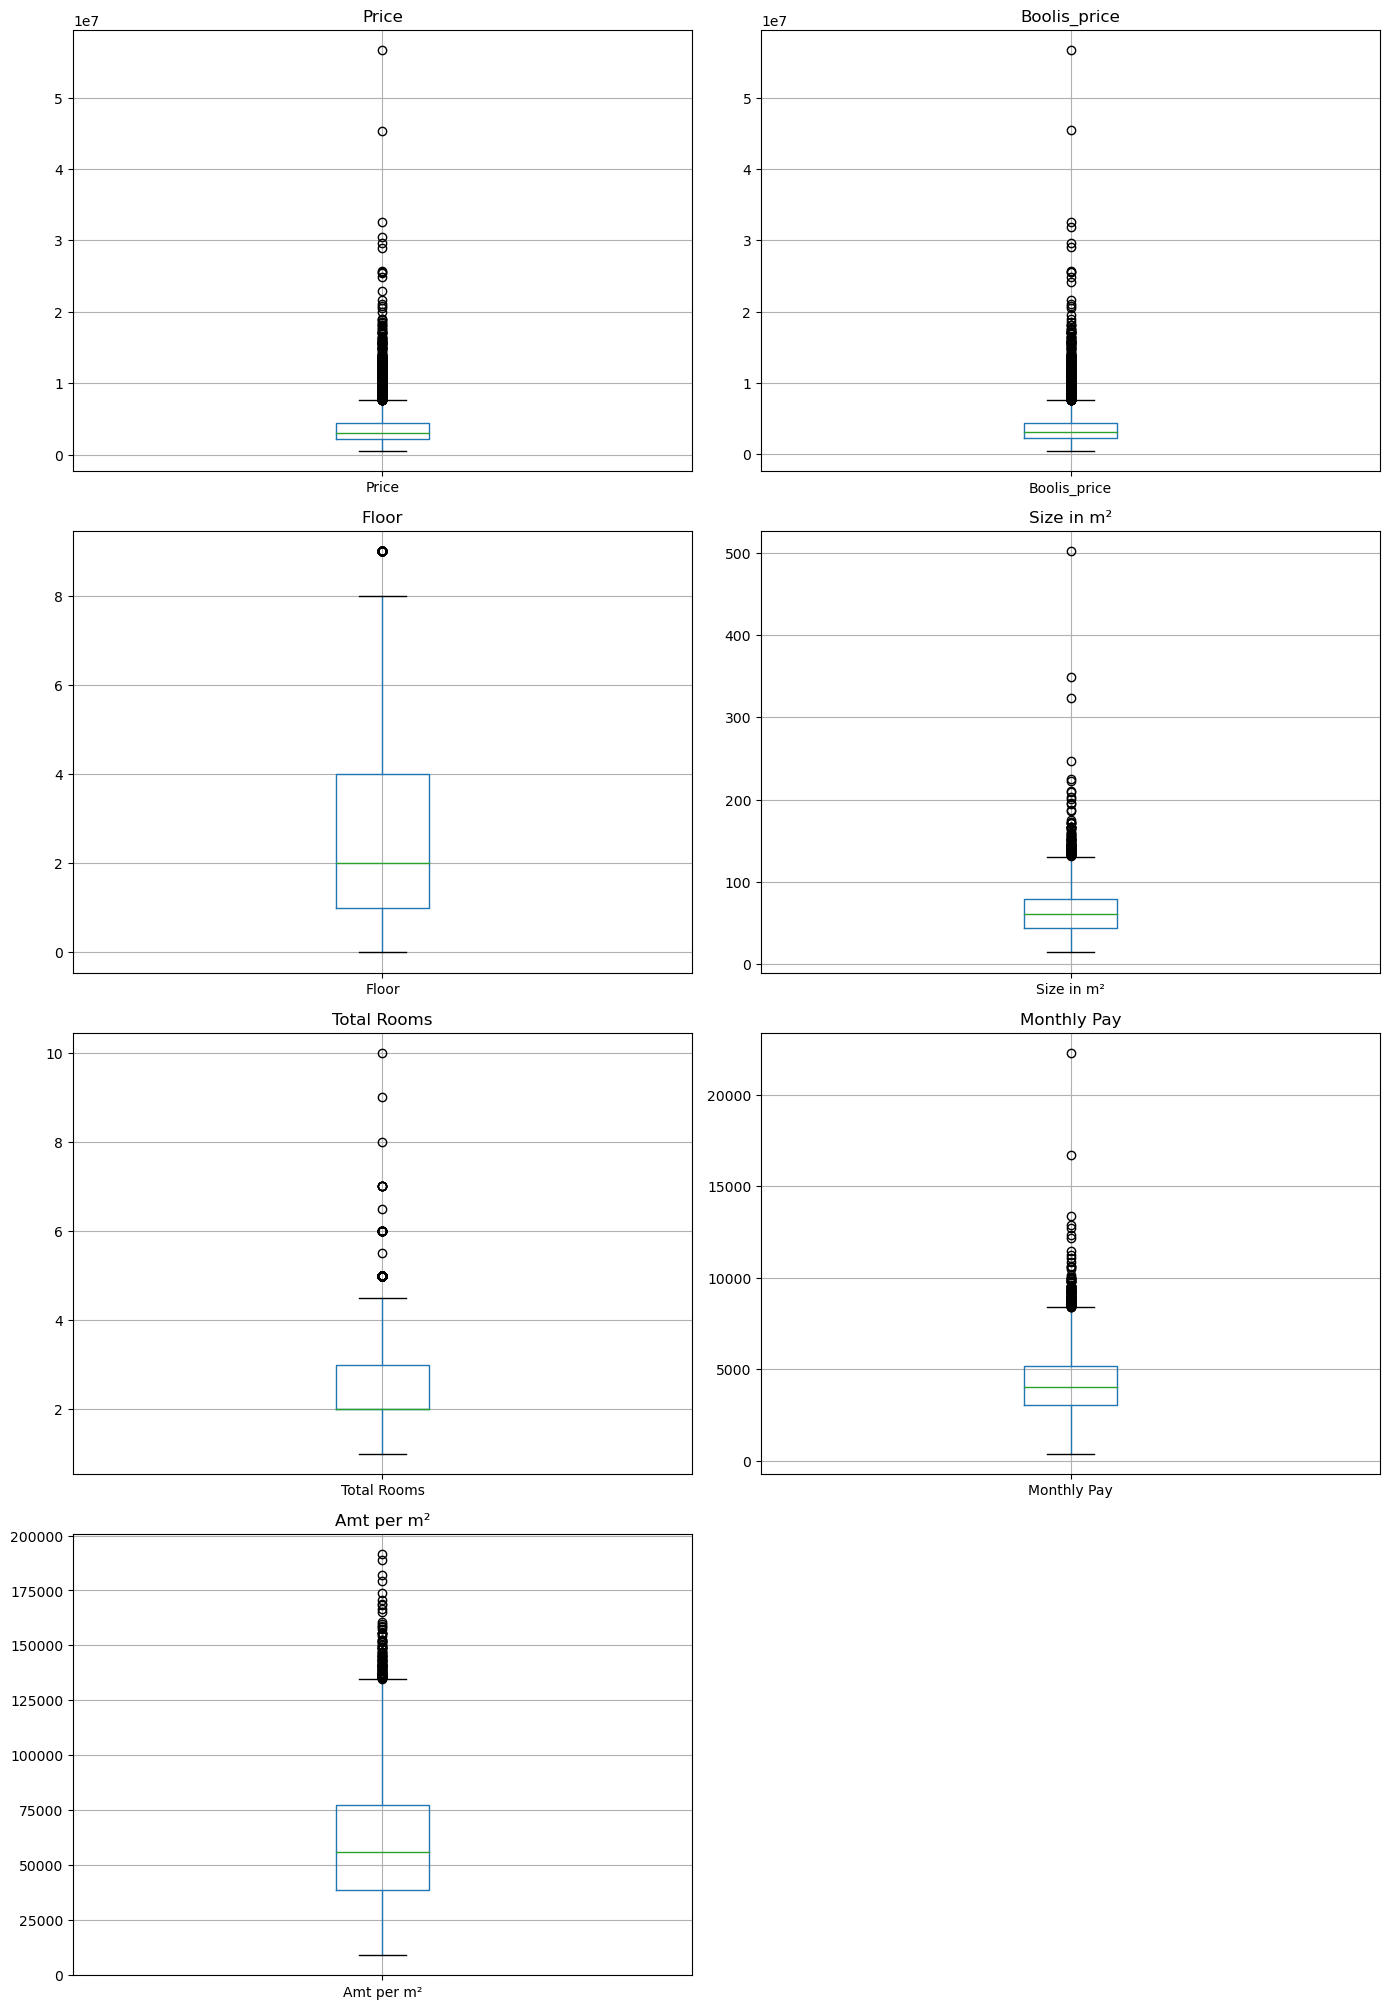

In [242]:
# Calculate the number of rows and columns for the subplots
num_columns = len(clean_df.columns)
num_rows = (num_columns // 2) + (num_columns % 2)

# Plot box plots for all columns
fig, axes = plt.subplots(num_rows, 2, figsize=(14, num_rows * 5))  # Increased figure size
axes = axes.flatten()  # Flatten the axes array for easy indexing

numeric_cols = clean_df.select_dtypes(include=[np.number])

for i, col in enumerate(numeric_cols):
    clean_df.boxplot(column=col, ax=axes[i])
    axes[i].set_title(col)
# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])


plt.tight_layout()
plt.show()

##### Save the file

 Save the cleaned dataset as a csv/excel file 

In [243]:
clean_df.to_csv('booli_clean.csv',index=False)